In [111]:
# Reload automatically when the file is changed.
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Importing Modules

In [112]:
import os 
import sys
MODULES_PATH = "Modules"
MODELS_PATH = "Models"

sys.path.append(MODULES_PATH)
sys.path.append(MODELS_PATH)


from Preprocessing import *
from Dataloaders_Preprocessing import *
from Train import *
from MLP_Direct    import *






# Importing Data

In [113]:
List_Data_Train = Load_Data('Data/atoms/train', 'Data/energies/train.csv')
List_Data_Val = Load_Test_Data('Data/atoms/test')

In [114]:
Display_Molecule_From_Atom_List(List_Data_Train[0]['Atoms_List'], Width=800, Height=800, Background_Color='lightblue')


3Dmol.js failed to load for some reason. Please check your browser console for error messages.

In [115]:
List_Data_Train[0]

{'Id': 5415,
 'Atoms_List': [{'Symbol': 'C', 'X': -1.446346, 'Y': -0.436476, 'Z': 0.370742},
  {'Symbol': 'C', 'X': 0.076637, 'Y': -0.504366, 'Z': 0.282528},
  {'Symbol': 'O', 'X': 0.696206, 'Y': -1.438524, 'Z': 0.765824},
  {'Symbol': 'C', 'X': 0.809729, 'Y': 0.603998, 'Z': -0.414085},
  {'Symbol': 'C', 'X': 0.233636, 'Y': 1.6711, 'Z': -0.976108},
  {'Symbol': 'H', 'X': -1.832306, 'Y': -1.305023, 'Z': 0.895733},
  {'Symbol': 'H', 'X': -1.889765, 'Y': -0.404355, 'Z': -0.623347},
  {'Symbol': 'H', 'X': -1.764102, 'Y': 0.460401, 'Z': 0.900525},
  {'Symbol': 'H', 'X': 1.893478, 'Y': 0.499982, 'Z': -0.446412},
  {'Symbol': 'H', 'X': -0.842246, 'Y': 1.81304, 'Z': -0.966871},
  {'Symbol': 'H', 'X': 0.82336, 'Y': 2.438608, 'Z': -1.464688}],
 'Atoms_DataFrame':    Symbol         X         Y         Z
 0       C -1.446346 -0.436476  0.370742
 1       C  0.076637 -0.504366  0.282528
 2       O  0.696206 -1.438524  0.765824
 3       C  0.809729  0.603998 -0.414085
 4       C  0.233636  1.671100 -

In [116]:
List_Data_Val[0]

{'Id': 7400,
 'Atoms_List': [{'Symbol': 'C', 'X': -0.626976, 'Y': 0.113989, 'Z': -1.980118},
  {'Symbol': 'C', 'X': -0.958239, 'Y': 0.623006, 'Z': -0.578352},
  {'Symbol': 'C', 'X': -0.411934, 'Y': -0.255524, 'Z': 0.529094},
  {'Symbol': 'C', 'X': -1.23096, 'Y': -0.843806, 'Z': 1.411518},
  {'Symbol': 'C', 'X': 1.08794, 'Y': -0.480179, 'Z': 0.589391},
  {'Symbol': 'N', 'X': 1.855524, 'Y': 0.761014, 'Z': 0.448525},
  {'Symbol': 'H', 'X': -1.049764, 'Y': 0.773424, 'Z': -2.735579},
  {'Symbol': 'H', 'X': -1.032006, 'Y': -0.882745, 'Z': -2.140298},
  {'Symbol': 'H', 'X': 0.44827, 'Y': 0.066349, 'Z': -2.141746},
  {'Symbol': 'H', 'X': -2.044088, 'Y': 0.706175, 'Z': -0.470983},
  {'Symbol': 'H', 'X': -0.557062, 'Y': 1.637614, 'Z': -0.463243},
  {'Symbol': 'H', 'X': -2.305551, 'Y': -0.71731, 'Z': 1.354377},
  {'Symbol': 'H', 'X': -0.844963, 'Y': -1.461315, 'Z': 2.214132},
  {'Symbol': 'H', 'X': 1.36394, 'Y': -1.217835, 'Z': -0.198486},
  {'Symbol': 'H', 'X': 1.351571, 'Y': -0.948779, 'Z': 1.5

In [130]:
def random_translate_and_rotate(positions, max_translation=5.0):

    positions = np.array(positions)

    # Translation aléatoire
    translation = np.random.uniform(-max_translation, max_translation, size=(1, 3))
    positions = positions + translation

    # Rotation aléatoire
    theta = np.random.uniform(0, 2 * np.pi)
    axis = np.random.randn(3)
    axis = axis / np.linalg.norm(axis)

    K = np.array([[0, -axis[2], axis[1]],
                  [axis[2], 0, -axis[0]],
                  [-axis[1], axis[0], 0]])
    R = np.eye(3) + np.sin(theta) * K + (1 - np.cos(theta)) * (K @ K)

    return (positions @ R.T).astype(np.float32)


In [131]:
Dataset_Train = MoleculeDataset_MLP(List_Data_Train, Nb_Atoms_Max_In_Molecule=23, Return_Energies=True,transform=random_translate_and_rotate)
Dataset_Test = MoleculeDataset_MLP(List_Data_Val, Nb_Atoms_Max_In_Molecule=23, Return_Energies=False,transform=random_translate_and_rotate)

In [132]:
Model = Model_MLP_Direct(
    Atom_Vocab_Size=6,  # H, C, N, O, S
    Embedding_Size=200,
    Nb_Hidden_Layers=9,
    Hidden_Layers_Size_List=[128, 256, 512, 256, 128, 64, 32, 16, 8],
    Output_Dim=1,
    Activation_Name='PReLU',
    Nb_Atomes_Max_In_Molecule=23
)

In [133]:
DataLoader_Train = Create_DataLoader(List_Data_Train, Batch_Size=128, Shuffle=True, Num_Workers=0, Test_Size=0, Return_Energies=True,Transform=random_translate_and_rotate)
DataLoader_Test = Create_DataLoader(List_Data_Val, Batch_Size=128, Shuffle=False, Num_Workers=0, Test_Size=0, Return_Energies=False, Transform=random_translate_and_rotate)

Epochs:   0%|          | 0/20 [00:00<?, ?it/s]

Batches:   0%|          | 0/52 [00:00<?, ?it/s]

/home/ayoubchoukri/anaconda3/envs/Personal/lib/python3.12/site-packages/torch/nn/modules/loss.py:608: UserWarning: Using a target size (torch.Size([128])) that is different to the input size (torch.Size([128, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
/home/ayoubchoukri/anaconda3/envs/Personal/lib/python3.12/site-packages/torch/nn/modules/loss.py:608: UserWarning: Using a target size (torch.Size([63])) that is different to the input size (torch.Size([63, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Batches:   0%|          | 0/52 [00:00<?, ?it/s]

Epoch: 1/20 Train Loss: 3381.286 Test Loss: 397.949 


Batches:   0%|          | 0/52 [00:00<?, ?it/s]

Batches:   0%|          | 0/52 [00:00<?, ?it/s]

Epoch: 2/20 Train Loss: 170.172 Test Loss: 142.824 


Batches:   0%|          | 0/52 [00:00<?, ?it/s]

Batches:   0%|          | 0/52 [00:00<?, ?it/s]

Epoch: 3/20 Train Loss: 142.066 Test Loss: 141.815 


Batches:   0%|          | 0/52 [00:00<?, ?it/s]

Batches:   0%|          | 0/52 [00:00<?, ?it/s]

Epoch: 4/20 Train Loss: 141.677 Test Loss: 141.137 


Batches:   0%|          | 0/52 [00:00<?, ?it/s]

Batches:   0%|          | 0/52 [00:00<?, ?it/s]

Epoch: 5/20 Train Loss: 140.693 Test Loss: 140.287 


Batches:   0%|          | 0/52 [00:00<?, ?it/s]

Batches:   0%|          | 0/52 [00:00<?, ?it/s]

Epoch: 6/20 Train Loss: 140.645 Test Loss: 141.709 


Batches:   0%|          | 0/52 [00:00<?, ?it/s]

Batches:   0%|          | 0/52 [00:00<?, ?it/s]

Epoch: 7/20 Train Loss: 140.649 Test Loss: 140.104 


Batches:   0%|          | 0/52 [00:00<?, ?it/s]

Batches:   0%|          | 0/52 [00:00<?, ?it/s]

Epoch: 8/20 Train Loss: 140.644 Test Loss: 139.688 


Batches:   0%|          | 0/52 [00:00<?, ?it/s]

Batches:   0%|          | 0/52 [00:00<?, ?it/s]

Epoch: 9/20 Train Loss: 139.872 Test Loss: 139.431 


Batches:   0%|          | 0/52 [00:00<?, ?it/s]

Batches:   0%|          | 0/52 [00:00<?, ?it/s]

Epoch: 10/20 Train Loss: 139.190 Test Loss: 139.044 


Batches:   0%|          | 0/52 [00:00<?, ?it/s]

Batches:   0%|          | 0/52 [00:00<?, ?it/s]

Epoch: 11/20 Train Loss: 140.276 Test Loss: 139.049 


Batches:   0%|          | 0/52 [00:00<?, ?it/s]

Batches:   0%|          | 0/52 [00:00<?, ?it/s]

Epoch: 12/20 Train Loss: 140.345 Test Loss: 138.476 


Batches:   0%|          | 0/52 [00:00<?, ?it/s]

Batches:   0%|          | 0/52 [00:00<?, ?it/s]

Epoch: 13/20 Train Loss: 139.642 Test Loss: 138.870 


Batches:   0%|          | 0/52 [00:00<?, ?it/s]

Batches:   0%|          | 0/52 [00:00<?, ?it/s]

Epoch: 14/20 Train Loss: 139.702 Test Loss: 139.610 


Batches:   0%|          | 0/52 [00:00<?, ?it/s]

Batches:   0%|          | 0/52 [00:00<?, ?it/s]

Epoch: 15/20 Train Loss: 139.188 Test Loss: 138.943 


Batches:   0%|          | 0/52 [00:00<?, ?it/s]

Batches:   0%|          | 0/52 [00:00<?, ?it/s]

Epoch: 16/20 Train Loss: 139.237 Test Loss: 139.135 


Batches:   0%|          | 0/52 [00:00<?, ?it/s]

Batches:   0%|          | 0/52 [00:00<?, ?it/s]

Epoch: 17/20 Train Loss: 139.543 Test Loss: 138.051 


Batches:   0%|          | 0/52 [00:00<?, ?it/s]

Batches:   0%|          | 0/52 [00:00<?, ?it/s]

Epoch: 18/20 Train Loss: 138.547 Test Loss: 139.454 


Batches:   0%|          | 0/52 [00:00<?, ?it/s]

Batches:   0%|          | 0/52 [00:00<?, ?it/s]

Epoch: 19/20 Train Loss: 138.616 Test Loss: 138.116 


Batches:   0%|          | 0/52 [00:00<?, ?it/s]

Batches:   0%|          | 0/52 [00:00<?, ?it/s]

Epoch: 20/20 Train Loss: 138.856 Test Loss: 138.455 


<Figure size 1500x1500 with 0 Axes>

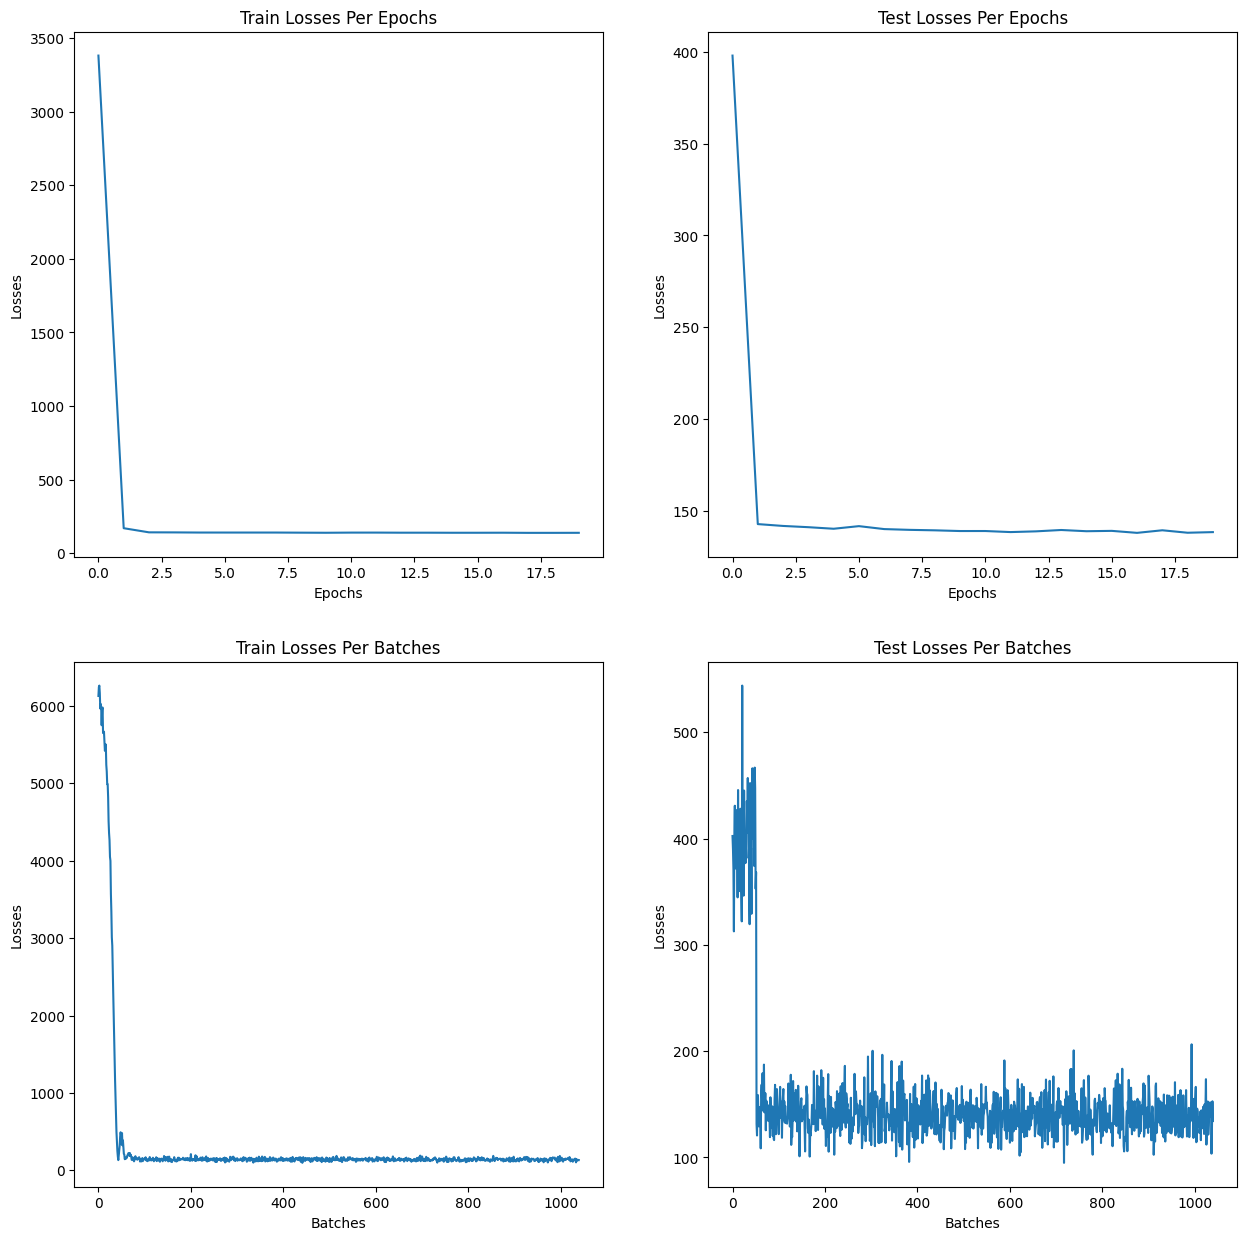

<Figure size 640x480 with 0 Axes>

In [134]:


Device = torch.device("cpu")
Model = Model_MLP_Direct(
    Atom_Vocab_Size=6,  # H, C, N, O, S
    Embedding_Size=8,
    Nb_Hidden_Layers=3,
    Hidden_Layers_Size_List=[64, 32, 16],
    Output_Dim=1,
    Activation_Name='PReLU',
    Nb_Atomes_Max_In_Molecule=23
)

Optimizer = torch.optim.Adam(Model.parameters(), lr=0.001)

Criterion = nn.MSELoss()

List_Train_Losses_Per_Epochs, List_Test_Losses_Per_Epochs, List_Train_Losses_Per_Batches, List_Test_Losses_Per_Batches = Train(
    Model,
    DataLoader_Train,
    DataLoader_Train,
    Optimizer,
    Criterion,
    Num_Epochs=20,
    Device=Device
)

Plot_Losses(
    List_Train_Losses_Per_Epochs,
    List_Test_Losses_Per_Epochs,
    List_Train_Losses_Per_Batches,
    List_Test_Losses_Per_Batches,
    Save=True,
    Save_Path='losses_plot.png'
)





In [135]:
Dataset_Test[0]

(7400,
 tensor([ 1.0000,  1.0000, -2.8448, -1.7277,  3.0458,  1.0000,  1.0000, -2.6854,
         -0.7840,  4.2208,  1.0000,  1.0000, -1.6378, -1.9764,  2.1597,  1.0000,
          0.0000, -1.9447, -1.1979,  4.9163,  1.0000,  0.0000, -1.5030, -1.0929,
          1.4947,  1.0000,  1.0000, -2.2548,  0.6251,  3.8174,  1.0000,  0.0000,
         -1.2917,  0.6165,  3.3105,  1.0000,  0.0000, -0.1756, -1.4717,  3.5216,
          1.0000,  2.0000, -0.4188, -2.2578,  2.9242,  1.0000,  1.0000, -4.0251,
         -2.3020,  2.7764,  1.0000,  0.0000, -3.6296, -0.7300,  4.7713,  1.0000,
          0.0000, -1.8387, -2.8268,  1.4946,  1.0000,  0.0000, -2.9803,  1.0786,
          3.1456,  1.0000,  0.0000, -4.9005, -2.1024,  3.3828,  1.0000,  0.0000,
         -4.1414, -2.9888,  1.9462,  1.0000,  0.0000, -2.1653,  1.2629,  4.6946,
          1.0000,  0.0000,  0.3594, -2.4380,  2.2952,  0.0000,  0.0000,  0.0000,
          0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,
          0.0000,  0.

In [136]:
# Compute the predictions on the test set

def Compute_Predictions(Model, Dataset_Test, Device):
    Model.eval()  # Set the model to evaluation mode
    Model.to(Device)

    Predictions = []
    Ids = []

    with torch.no_grad():
        for Id, X,E in tqdm(Dataset_Test, desc="Computing Predictions"):
            X = X.to(Device)
            Ids.append(Id)
            output = Model(X.unsqueeze(0))  # Add batch dimension
            Predictions.append(output.item())

    return Ids, Predictions

In [137]:
Ids, Predictions = Compute_Predictions(Model, Dataset_Test, Device)

Computing Predictions:   0%|          | 0/1647 [00:00<?, ?it/s]

In [138]:
Predictions

[-78.77276611328125,
 -76.36434173583984,
 -75.58988189697266,
 -78.0964584350586,
 -78.4811782836914,
 -77.87200164794922,
 -75.97513580322266,
 -78.07149505615234,
 -76.01065063476562,
 -76.12242889404297,
 -77.19620513916016,
 -77.3221435546875,
 -76.11743927001953,
 -77.58699035644531,
 -78.87227630615234,
 -78.39579010009766,
 -79.32099151611328,
 -78.56095886230469,
 -78.23529815673828,
 -77.7563705444336,
 -76.36663055419922,
 -77.1827163696289,
 -78.40288543701172,
 -77.3360824584961,
 -79.210693359375,
 -76.95914459228516,
 -74.73799896240234,
 -75.44849395751953,
 -76.81798553466797,
 -77.04447174072266,
 -76.25106048583984,
 -74.34555053710938,
 -75.69080352783203,
 -75.60738372802734,
 -77.54344940185547,
 -76.0228271484375,
 -75.59369659423828,
 -77.00118255615234,
 -76.0417251586914,
 -75.27413940429688,
 -79.02742767333984,
 -76.796142578125,
 -77.27911376953125,
 -77.86221313476562,
 -78.08409881591797,
 -76.49434661865234,
 -76.39466094970703,
 -78.96454620361328,
 -77

In [141]:
# create a csv file with the predictions

import pandas as pd
def Save_Predictions_To_CSV(Ids, Predictions, Output_CSV_Path):
    df = pd.DataFrame({
        'id': Ids,
        'energy': Predictions
    })
        # sort the dataframe by id
    df.sort_values(by='id', inplace=True)
    df.to_csv(Output_CSV_Path, index=False)


    print(f"Predictions saved to {Output_CSV_Path}")

Save_Predictions_To_CSV(Ids, Predictions, 'predictions.csv')

Predictions saved to predictions.csv


Original:
 [[0. 0. 0.]
 [5. 0. 0.]
 [0. 1. 0.]]
Transformé:
 [[ 3.4398777 -4.6810465  3.684741 ]
 [ 8.436922  -4.6100144  3.841261 ]
 [ 3.4258347 -3.68116    3.679314 ]]

Distances originales: [5.         1.         5.09901951]
Distances transformées: [5.        0.9999998 5.0990186]

✅ La rotation conserve les distances : test réussi.


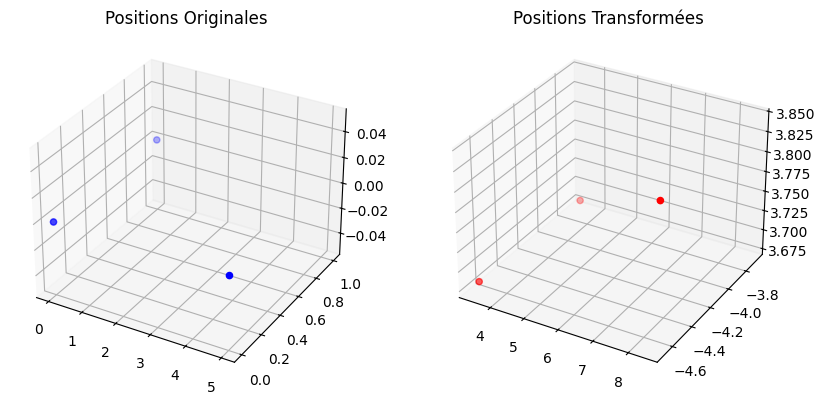

In [162]:
import numpy as np




def test_rotation_invariance():
    # Crée une "molécule" avec 3 atomes
    original_positions = np.array([
        [0.0, 0.0, 0.0],
        [5.0, 0.0, 0.0],
        [0.0, 1.0, 0.0]
    ])

    transformed_positions = random_translate_and_rotate(original_positions, max_translation=5.0)

    print("Original:\n", original_positions)
    print("Transformé:\n", transformed_positions)

    # Vérification des distances inter-atomiques (doivent rester les mêmes)
    def pairwise_distances(positions):
        n = len(positions)
        distances = []
        for i in range(n):
            for j in range(i + 1, n):
                d = np.linalg.norm(positions[i] - positions[j])
                distances.append(d)
        return np.array(distances)

    d_orig = pairwise_distances(original_positions)
    d_trans = pairwise_distances(transformed_positions)

    print("\nDistances originales:", d_orig)
    print("Distances transformées:", d_trans)

    if np.allclose(d_orig, d_trans, atol=1e-5):
        print("\n✅ La rotation conserve les distances : test réussi.")
    else:
        print("\n❌ Les distances ont changé : problème avec la rotation.")


    # Plot les positions originales et transformées
    import matplotlib.pyplot as plt
    fig = plt.figure(figsize=(10, 5))
    ax = fig.add_subplot(121, projection='3d')
    ax.scatter(original_positions[:, 0], original_positions[:, 1], original_positions[:, 2], color='blue', label='Original')
    ax.set_title('Positions Originales')
    ax = fig.add_subplot(122, projection='3d')
    ax.scatter(transformed_positions[:, 0], transformed_positions[:, 1], transformed_positions[:, 2], color='red', label='Transformé')
    ax.set_title('Positions Transformées')
    plt.show()
    

# Lancer le test
test_rotation_invariance()
